# Investments results inspection
Routines for inspecting and visualizing _pommesinvest_ investment results

## Package imports

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from pommesevaluation.investment_results_inspection import (
    preprocess_raw_results, aggregate_investment_decision_results, plot_single_investment_variable
)

## Read in data
* Define model configuration / results to be analyzed
* Read in the actual results

In [44]:
time_frame_in_years = 2
frequency = "24H"
path_results = "./model_results/"
path_plots = "./plots/"

FUELS = {
    "biomass": "#15b01a",
    "hydrogen": "#6fa8dc",
    "natgas": "#929591",
    "oil": "#aaa662",
    "waste": "#c04e01"
}
STORAGES_INFLOW = {
    "PHS_inflow": "#0c2aac",
    "battery_inflow": "#f7e09a"
}
DEMAND_RESPONSE_CLUSTERS = {
    "hoho_cluster_shift_only": "#333333", 
    "hoho_cluster_shift_shed": "#555555", 
    "ind_cluster_shed_only": "#666666",
    "ind_cluster_shift_only": "#888888", 
    "ind_cluster_shift_shed": "#aaaaaa", 
    "tcs+hoho_cluster_shift_only": "#cccccc",
    "tcs_cluster_shift_only": "#dddddd", 
}

filename = (
    f"investment_LP_start-2020-01-01_{time_frame_in_years}"
    f"-years_simple_freq_{frequency}_investment.csv"
)

investment_results_raw = pd.read_csv(f"{path_results}{filename}", index_col=0)

In [34]:
processed_results = preprocess_raw_results(investment_results_raw)
aggregated_results, storage_results = aggregate_investment_decision_results(
    processed_results, energy_carriers=FUELS, by="energy_carrier"
)

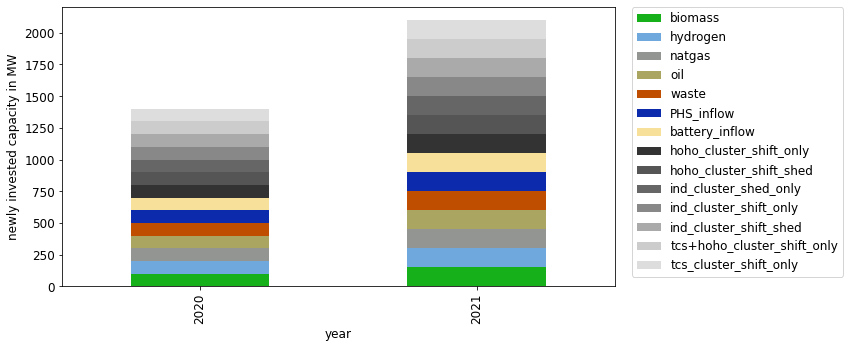

In [46]:
plt.rcParams.update({'font.size': 12})
plot_single_investment_variable(
    aggregated_results,
    "invest",
    colors={**FUELS, **STORAGES_INFLOW, **DEMAND_RESPONSE_CLUSTERS},
    aggregation="energy_carrier"
)

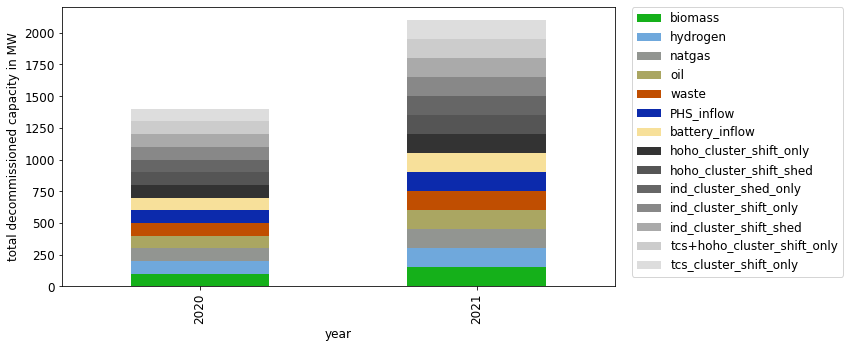

In [47]:
plt.rcParams.update({'font.size': 12})
plot_single_investment_variable(
    aggregated_results,
    "old",
    colors={**FUELS, **STORAGES_INFLOW, **DEMAND_RESPONSE_CLUSTERS},
    aggregation="energy_carrier"
)